In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1- Generate continuous random dataset for the problem of X = study hours and Y = grade of students (if you study more, you will get a higher grade).

In [2]:
X=np.random.normal(4,1,200)
Y=np.random.normal(1,0.1,200)*X
# X,Y

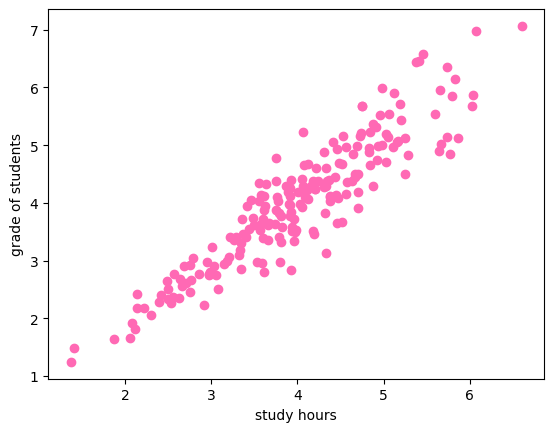

In [3]:
plt.scatter(X,Y,c="hotpink")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.show()

2- Split your dataset to train and test with train_test_split function.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, shuffle=True)
X_train, Y_train,X_test,Y_test

(array([4.19864823, 3.55555194, 4.87874251, 4.11910366, 2.53362437,
        4.22050823, 5.64418489, 4.70131576, 4.04903493, 4.06584803,
        2.94903242, 4.0684186 , 3.5834062 , 4.47937486, 4.31038674,
        3.96433525, 3.98535507, 5.05612135, 4.23339885, 4.51254054,
        2.49271739, 3.41519957, 3.49037294, 4.46106273, 4.83273117,
        4.83854351, 2.48744158, 4.37005265, 4.15382153, 3.65689255,
        2.75085855, 3.61446467, 3.74598211, 4.08773457, 3.80496905,
        3.36126601, 3.45753153, 4.62943427, 4.56536849, 4.31440087,
        5.11847271, 3.55117229, 3.87148108, 5.41360616, 5.11079754,
        2.63871334, 5.20597577, 5.83197689, 3.40410845, 5.16175052,
        4.69589222, 4.70234447, 4.83765055, 3.34852631, 3.60187424,
        4.3475193 , 2.07978693, 5.285906  , 5.65051809, 5.02307406,
        2.38877284, 5.73523842, 3.94127977, 5.38091671, 3.90921105,
        5.18802192, 2.97691661, 4.33353052, 2.55643203, 4.95875216,
        3.63836027, 4.72009953, 2.96959687, 2.62

3- Draw some wrong red lines with a random slope.

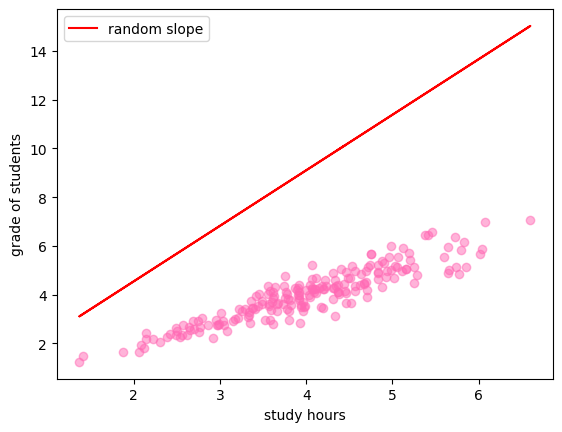

In [5]:
random_slope=np.random.uniform(0,5)
# random_slope
plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

4- Draw the correct blue line using your Object Oriented Linear Least Squares (LLS) method.

In [6]:
np.shape(X_train)
X_train=X_train.reshape(-1,1)

In [7]:
W=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
W

array([0.99820565])

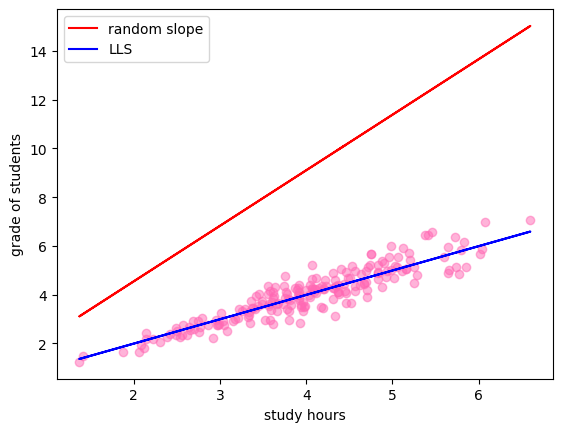

In [8]:
plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.plot(X,W*X,c="blue",label="LLS")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

5- Draw a green line using linregress from scipy library. Compare your result with scipy's result.

In [9]:
from scipy import stats

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


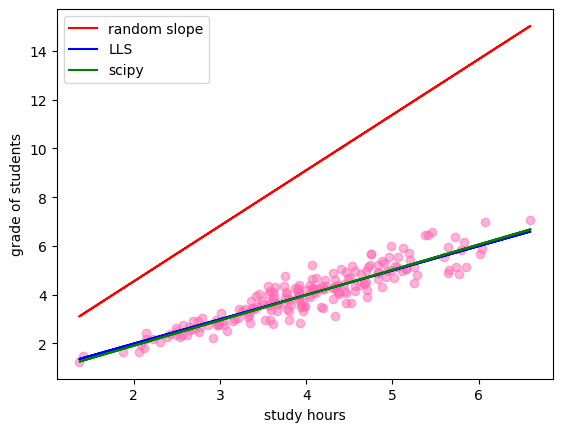

In [10]:
slope, intercept, r, p, std_err = stats.linregress(X_train.T,Y_train)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))
# mymodel

plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.plot(X,W*X,c="blue",label="LLS")
plt.plot(X,mymodel,c="green",label="scipy")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()
